### XML을 대처하는 두 가지 방법
* 1. 딕셔너리처럼 다루는 방법(딕셔너리로 변환)
* 2. 새로운 접근법을 적용

In [1]:
import requests
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=4111758000'
requests.get(url).text
# 기존 JSON을 다룰 때에는 .json() 메서드로 비로 딕셔너리로 바꿔주었으나
# xml의 경우 변환과정이 한 단계 더 필요합니다.
# 이를 위해 일단 내 컴퓨터로 오는 응답 내용을 .text 를 이용해
# 문자열로 바꿨습니다.

'<?xml version="1.0" encoding="UTF-8" ?>\n<rss version="2.0">\n<channel>\n<title>기상청 동네예보 웹서비스 - 경기도 수원시영통구 영통2동 도표예보</title>\n<link>http://www.kma.go.kr/weather/main.jsp</link>\n<description>동네예보 웹서비스</description>\n<language>ko</language>\n<generator>동네예보</generator>\n<pubDate>2020년 12월 21일 (월)요일 20:00</pubDate>\n <item>\n<author>기상청</author>\n<category>경기도 수원시영통구 영통2동</category>\n<title>동네예보(도표) : 경기도 수원시영통구 영통2동 [X=61,Y=120]</title><link>http://www.kma.go.kr/weather/forecast/timeseries.jsp?searchType=INTEREST&amp;dongCode=4111758000</link>\n<guid>http://www.kma.go.kr/weather/forecast/timeseries.jsp?searchType=INTEREST&amp;dongCode=4111758000</guid>\n<description>\n <header>\n  <tm>202012212000</tm>\n  <ts>6</ts>\n  <x>61</x>\n  <y>120</y>\n </header>\n <body>\n  <data seq="0">\n   <hour>24</hour>\n   <day>0</day>\n   <temp>-2.0</temp>\n   <tmx>-999.0</tmx>\n   <tmn>-999.0</tmn>\n   <sky>4</sky>\n   <pty>0</pty>\n   <wfKor>흐림</wfKor>\n   <wfEn>Cloudy</wfEn>\n   <pop>30</pop>\n   <r1

In [2]:
!pip install xmltodict

In [10]:
import requests
import xmltodict
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=4111758000'
response = requests.get(url).text
weather_data = xmltodict.parse(response)
# parse 는 해석 / 해독인데, 안에 들어있는 정보는 바꾸지 않고
# 형식만 바꾸는 것입니다.
weather_data['rss']['channel']['title']
# JSON 했을때와 마찬가지로 동일한 접근법 이용해
# .keys 메서드로 키를 찾아 들어갈 수 있겠습니다.

'기상청 동네예보 웹서비스 - 경기도 수원시영통구 영통2동 도표예보'

In [26]:
import requests
import xmltodict
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=4111758000'
response = requests.get(url).text
weather_data = xmltodict.parse(response)
weather_list = weather_data['rss']['channel']['item']['description']['body']['data']
# 에러가 발생했던 이유는, 리스트였기 때문에  리스트는 .keys 메서드가 없어서
weather_list[2].keys()
# 리스트이기 때문에 인덱싱 가능.

odict_keys(['@seq', 'hour', 'day', 'temp', 'tmx', 'tmn', 'sky', 'pty', 'wfKor', 'wfEn', 'pop', 'r12', 's12', 'ws', 'wd', 'wdKor', 'wdEn', 'reh', 'r06', 's06'])

In [18]:
sample = [1, 2, 3, 4, 5]
for a in sample: # 리스트는 for문으로 하나씩 뽑아 쓸 수 있습니다.
    print(a)

1
2
3
4
5


In [19]:
sample.keys()

AttributeError: 'list' object has no attribute 'keys'

In [27]:
import requests
import xmltodict
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=4111758000'
response = requests.get(url).text
weather_data = xmltodict.parse(response)
weather_list = weather_data['rss']['channel']['item']['description']['body']['data']
for one in weather_list:
    # 리스트는 for 문으로 하나씩 뽑아서 쓸 수 있기 때문에 이를 이용.
    weather = one['wfKor']
    print(weather)

흐림
흐림
흐림
구름 많음
구름 많음
맑음
맑음
맑음
맑음
맑음
맑음
흐림
맑음
구름 많음
흐림
흐림
흐림


In [2]:
import requests
import xmltodict
url = 'http://www.kma.go.kr/wid/queryDFSRSS.jsp?zone=4111758000'
response = requests.get(url).text
weather_data = xmltodict.parse(response)
weather_list = weather_data['rss']['channel']['item']['description']['body']['data']
for one in weather_list:
    weather = one['wfKor']
    day = one['day']
    hour = one['hour']
    if day == '1':
        if hour == '9':
            print(day, hour, weather)
# 위 예제코드로 실행했을 때 왜 내일 아침 9시의 정보가 화면에 나오지 않는 것인가?
# Hint : 컴퓨터는 정직하다.

1 9 맑음


In [7]:
import requests
import xmltodict
import pandas as pd
url = 'https://news.google.com/rss/search?q=펭수&hl=ko&gl=KR&ceid=KR%3Ako'
# .com 뒤에 /rss 를 직접 추가하였습니다. 이 것을 넣으면 내 컴퓨터로 xml이 옵니다.
response = requests.get(url).text
all_data = xmltodict.parse(response)
news_list = all_data['rss']['channel']['item']
all_news_list = []
for news in news_list:
    title = news['title']
    link = news['link']
    all_news_list.append({'title' : title, 'link' : link})
pd.DataFrame(all_news_list).to_csv('펭수.csv', encoding='utf-8-sig')
# encoding='utf-8-sig' -> 저장하는 방식을 지정한 것입니다.
# 이거 안 넣고 저장한 후에 엑셀로 열어보면 한글이 깨지게 되는데
# 한글 깨짐은 저장된 형식과 읽을때의 형식이 서로 달라서 생김.

### 새 친구 BeautifulSoup 을 만나봅니다.

In [22]:
'''
import pandas as pd
import requests
import bs4
url = 'https://news.google.com/rss/search?q=펭수&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text
all_data = bs4.BeautifulSoup(response)  # 여기 달라짐
# parsing 하는 메서드의 이름이 아름다운soup 인 것입니다.
all_news = all_data.find_all('item') # 여기 달라짐
all_news_list = []
for news in all_news:
    title = news.find('title') # 여기 달라짐
    link = news.find('link') # 여기 달라짐
    all_news_list.append({'title' : title, 'link' : link})
pd.DataFrame(all_news_list).to_csv('펭수.csv', encoding='utf-8-sig')
'''
import pandas as pd
import requests
import bs4
url = 'https://news.google.com/rss/search?q=펭수&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text
all_data = bs4.BeautifulSoup(response)  # 해석기를 바꿨습니다.
# parsing 하는 메서드의 이름이 아름다운soup 인 것입니다.
all_news = all_data.find_all('item') # 관심있는 태그만 찾기(중간단계 건너뜀)
all_news_list = []
for news in all_news:
    title = news.find('title'). # 딕셔너리에서 title 키로 찾은 것 처럼 title 태그로 찾음
    link = news.find('link') # 딕셔너리에서 link 키로 찾은 것 처럼 link 태그로 찾음
    all_news_list.append({'title' : title, 'link' : link})
pd.DataFrame(all_news_list).to_csv('펭수.csv', encoding='utf-8-sig')

In [24]:
import pandas as pd
import requests
import bs4
url = 'https://news.google.com/rss/search?q=펭수&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text
all_data = bs4.BeautifulSoup(response)
all_news = all_data.find_all('item')
all_news_list = []
for news in all_news:
    title = news.find('title').text # 원하는 정보까지 다 찾았다면
    link = news.find('link') # 마지막에 .text 를 붙여서 태그 정보 지우기
    all_news_list.append({'title' : title, 'link' : link})
pd.DataFrame(all_news_list).to_csv('펭수.csv', encoding='utf-8-sig')

In [25]:
import pandas as pd
import requests
import bs4
url = 'https://news.google.com/rss/search?q=펭수&hl=ko&gl=KR&ceid=KR%3Ako'
response = requests.get(url).text
all_data = bs4.BeautifulSoup(response, 'xml') # 해석기를 갈아끼웠습니다.
all_news = all_data.find_all('item')
all_news_list = []
for news in all_news:
    title = news.find('title').text # link 가 제대로 해석이 되지 않았었기 때문에
    link = news.find('link').text # BeautifulSoup 해석단계에서 해석기를 직접 정했습니다.
    all_news_list.append({'title' : title, 'link' : link})
pd.DataFrame(all_news_list).to_csv('펭수.csv', encoding='utf-8-sig')

##### 키워드 입력해 뉴스 정보를 가져와 저장하는 news_get 함수를 만들어줍니다.

In [26]:
import pandas as pd
import requests
import bs4
def news_get(kw):
    url = f'https://news.google.com/rss/search?q={kw}&hl=ko&gl=KR&ceid=KR%3Ako'
    response = requests.get(url).text
    all_data = bs4.BeautifulSoup(response, 'xml') # 해석기를 갈아끼웠습니다.
    all_news = all_data.find_all('item')
    all_news_list = []
    for news in all_news:
        title = news.find('title').text # link 가 제대로 해석이 되지 않았었기 때문에
        link = news.find('link').text # BeautifulSoup 해석단계에서 해석기를 직접 정했습니다.
        all_news_list.append({'title' : title, 'link' : link})
    pd.DataFrame(all_news_list).to_csv(f'{kw}.csv', encoding='utf-8-sig')

In [28]:
news_get('디스코드')

### JSON, XML 마무리

In [35]:
# JSON
import requests
import pandas as pd
ing = 'mint'
rec = 'pizza'
url = f'http://www.recipepuppy.com/api/?i={ing}&q={rec}'
all_recipe = requests.get(url).json()['results']
pd.DataFrame(all_recipe).to_csv(f'{ing}_{rec}.csv')

,title,href,ingredients,thumbnail
0,Grilled Pizza with Margherita Pizza Variation,http://www.bigoven.com/140778-Grilled-Pizza-wi...,"pizza dough, tomato sauce, pecorino, tomato, b...",
1,"Eggplant, Tomato, and Fontina Pizza",http://epicurious.com/recipes/food/views/230755,"eggplant, salt, basil, mint, garlic, grape tom...",
2,Cone Pizza Tuna With Herb Recipe,http://www.grouprecipes.com/2463/cone-pizza-tu...,"tuna, cream cheese, wine, mint, lemon, parmesa...",http://img.recipepuppy.com/278949.jpg
3,Armenian Pizza - Lahmajoun,http://www.recipezaar.com/Armenian-Pizza-Lahma...,"black pepper, red pepper flakes, tomato, cumin...",http://img.recipepuppy.com/79336.jpg
4,Artichoke and Feta Cheese Pizza,http://www.recipezaar.com/Artichoke-and-Feta-C...,"mint, feta cheese, artichoke, pizza dough, tom...",
5,"Layered Pear Pizza with Ricotta, Apricot Prese...",http://www.foodnetwork.com/recipes/robin-mille...,"apricot preserves, granola, mint, ricotta cheese",
6,No Sauce Tomato Pizza Topping,http://www.bigoven.com/115815-No-Sauce-Tomato-...,"olive oil, plum tomato, feta cheese, mozzarell...",
7,\nPizza Dips Recipe\n\n,http://cookeatshare.com/recipes/pizza-dips-11370,"breakfast sausage, flour, parmesan cheese, mar...",http://img.recipepuppy.com/905127.jpg
8,Strawberry Breakfast Pizza,"http://www.cooks.com/rec/view/0,195,158172-241...","mint, orange, biscuits, cream cheese, strawber...",
9,Turkish Pizza,http://find.myrecipes.com/recipes/recipefinder...,"pitas, olive oil, paprika, butter, spinach, ko...",http://img.recipepuppy.com/546691.jpg


In [38]:
# JSON
import requests
import pandas as pd
def json_recipe(ing, rec):
    url = f'http://www.recipepuppy.com/api/?i={ing}&q={rec}'
    all_recipe = requests.get(url).json()['results']
    pd.DataFrame(all_recipe).to_csv(f'{ing}_{rec}.csv')
json_recipe('tuna', 'pizza')

In [45]:
# XML - xmltodict
import requests
import xmltodict
url = 'http://www.recipepuppy.com/api/?i=tuna&q=pizza&format=xml'
response = requests.get(url).text
all_recipe = xmltodict.parse(response)
recipe_list = all_recipe['recipes']['recipe']
all_recipe_list = []
for recipe in recipe_list:
    title = recipe['title']
    ingredients = recipe['ingredients']
    all_recipe_list.append({'title' : title, 'ing' : ingredients})
pd.DataFrame(all_recipe_list).to_csv('tuna_pizza.csv')

In [46]:
# XML - beautifulsoup
import requests
import bs4
url = 'http://www.recipepuppy.com/api/?i=tuna&q=pizza&format=xml'
response = requests.get(url).text
all_recipe = bs4.BeautifulSoup(response, 'xml') # xmltodict 상 parsing과 동일
recipe_list = all_recipe.find_all('recipe')
all_recipe_list = []
for recipe in recipe_list:
    title = recipe.find('title').text
    ingredients = recipe.find('ingredients').text
    all_recipe_list.append({'title' : title, 'ing' : ingredients})
pd.DataFrame(all_recipe_list).to_csv('tuna_pizza.csv')

#### 다음 수업시간에는 HTML 을 다룹니다.
* 절차는 거의 동일합니다.
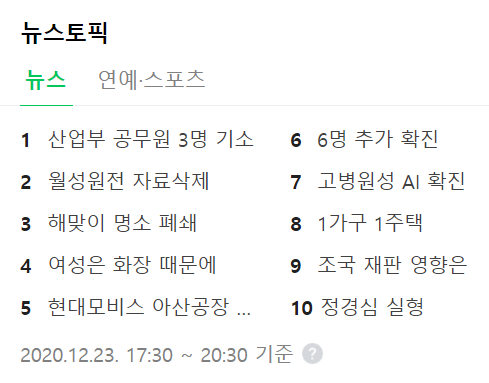

In [47]:
import requests
import bs4
url = 'https://search.naver.com/search.naver?sm=tab_hty.top&where=nexearch&query=skswnebo&oquery=%E3%85%93%EC%96%B4%EC%95%84%EB%82%98%EB%84%88%EC%9C%A4%E3%85%81%3B%EB%82%98&tqi=U%2BK%2BadprvxsssjM4cn0ssssstW8-303422'
one_page = bs4.BeautifulSoup(requests.get(url).text)
# one_page.find, one_page.find_all 이용하여 찾아나설 것입니다.

<!DOCTYPE html>
<html lang="ko"> <head> <meta charset="utf-8"/> <meta content="always" name="referrer"/> <meta content="telephone=no,address=no,email=no" name="format-detection"/> <meta content="width=device-width,initial-scale=1.0,maximum-scale=2.0" name="viewport"/> <meta content="skswnebo : 네이버 통합검색" property="og:title"/> <meta content="https://ssl.pstatic.net/sstatic/search/common/og_v3.png" property="og:image"/> <meta content="'skswnebo'의 네이버 통합검색 결과입니다." property="og:description"/> <meta content="'skswnebo'의 네이버 통합검색 결과입니다." lang="ko" name="description"/> <title>skswnebo : 네이버 통합검색</title> <link href="https://ssl.pstatic.net/sstatic/search/favicon/favicon_191118_pc.ico" rel="shortcut icon"/> <link href="https://ssl.pstatic.net/sstatic/search/opensearch-description.https.xml" rel="search" title="Naver" type="application/opensearchdescription+xml"/><link href="https://ssl.pstatic.net/sstatic/search/pc/css/search1_201223.css" rel="stylesheet" type="text/css"/> <link href="https://ss